#.1.데이터셋 얻기

In [42]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train.shape

(60000, 28, 28)

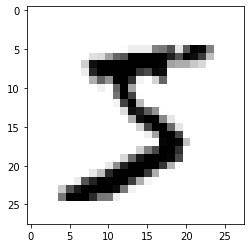

5


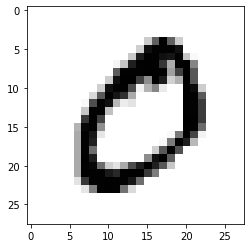

0


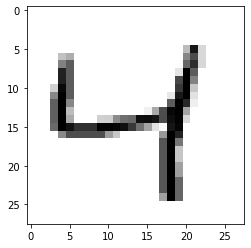

4


In [43]:
import matplotlib.pyplot as plt

for i in range(3):
  plt.imshow(X_train[i],cmap = plt.cm.binary)
  plt.show()
  print(y_train[i])

> train에는 이미지 데이터가 label에는 결과 정보가 저장되어 있는 것을 알  수 있다.

#2. 모델 만들기

##2.1모델 틀 생성

In [44]:
from keras import models
model = models.Sequential()


##2.2 Layer 추가 

In [45]:
from keras import layers

model.add(layers.Dense(512,activation='relu',input_shape=(28*28, )))
model.add(layers.Dense(10,activation='softmax'))


##2.3 컴파일

In [46]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#3. 데이터 변환

In [47]:
X_train.shape

(60000, 28, 28)

In [48]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# 백터 데이터로 변환하기 위해 reshape 처리
# layer에 입력 데이터의 모양이 28*28로 되어 있어 같은 모양으로 변경함.
X_train_reshape = X_train.reshape(60000,28*28)
# 성능 향상을 위해 실수화 처리
X_train_reshape = X_train_reshape.astype('float32')/255

print(X_train_reshape[0])

In [50]:
from tensorflow.keras.utils import to_categorical

y_train_onthot = to_categorical(y_train)
print(y_train[:10])
print(y_train_onthot[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#4. 모델 학습 및 평가

##4.1 모델 학습하기

In [51]:

model.fit(
    X_train_reshape,y_train_onthot,
    epochs=5, batch_size=128
)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2540 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1035 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0684 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0489 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0369 - accuracy: 0.9893


##4.2 평가하기

In [52]:
X_test.shape

(10000, 28, 28)

In [59]:
X_test_reshape = X_test.reshape(10000,28*28)
X_trest_reshape = X_test_reshape.astype('float32')/255

y_test_onthot = to_categorical(y_test)


In [60]:
loss,acc = model.evaluate(X_test_reshape, y_test_onthot,verbose=2)

313/313 - 1s - loss: 10.5879 - accuracy: 0.9805


#5. 예측하기

In [63]:
import pandas as pd

pred= model.predict(X_test_reshape)
pred[0]

s = pd.Series(pred[0])
s.sort_values(ascending=False)

7    1.0
9    0.0
8    0.0
6    0.0
5    0.0
4    0.0
3    0.0
2    0.0
1    0.0
0    0.0
dtype: float32

In [ ]:
import numpy as np

for i in range(3):
  plt.imshow(X_test[i],cmap=plt.cm.binary)
  plt.show()
  print(np.argmax(pred[i]))

#6. 모델 저장하기

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
from keras.models import load_model

model_path = '/content/drive/MyDrive/17. 이미지 분석2/model'
model.save(model_path + '/mnist_v1.h5');